In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
%matplotlib inline

In [2]:
df = pd.read_csv("C:/Users/Teja/Desktop/wine_data.csv",header = 0)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


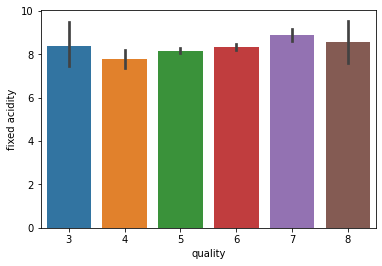

In [4]:
sns.barplot(x = 'quality', y = 'fixed acidity', data = df)

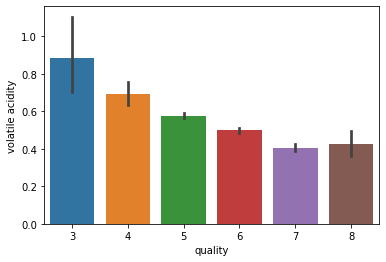

In [5]:
sns.barplot(x = "quality", y = "volatile acidity", data = df)

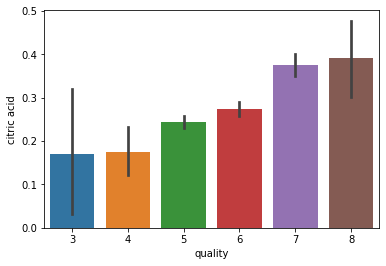

In [6]:
sns.barplot(x = "quality",y = "citric acid",data = df)

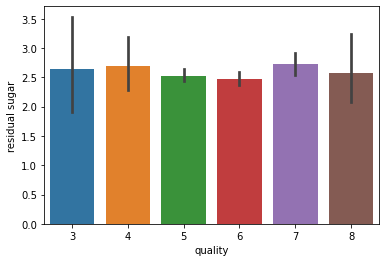

In [7]:
sns.barplot(x = "quality", y = "residual sugar", data = df)

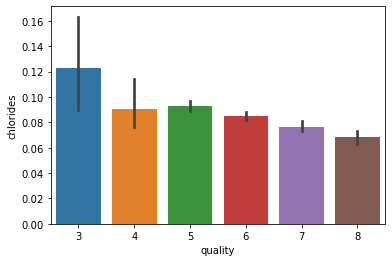

In [8]:
sns.barplot(x = "quality",y = "chlorides", data = df)

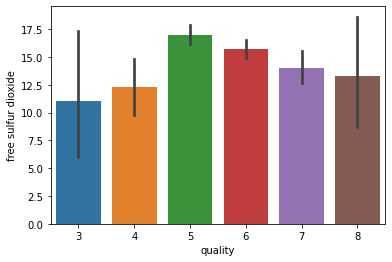

In [9]:
sns.barplot(x = "quality",y = "free sulfur dioxide", data = df)

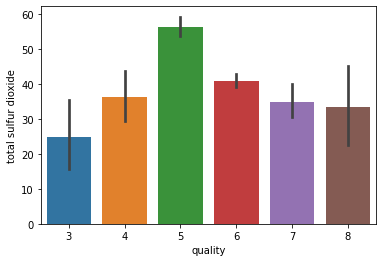

In [10]:
sns.barplot(x = "quality",y = "total sulfur dioxide",data = df)

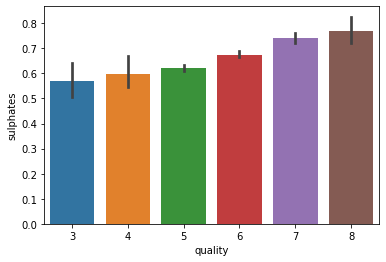

In [11]:
sns.barplot(x = "quality",y = "sulphates", data = df)

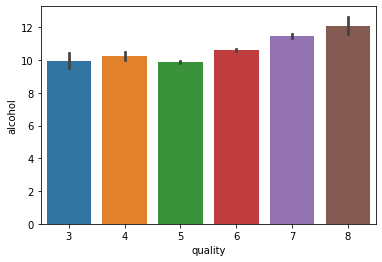

In [12]:
sns.barplot(x = "quality",y = "alcohol",data =df)

In [13]:
bins = [2,6.5,8]
grp_names = ['bad','good']
df["quality"] = pd.cut(df["quality"],bins = bins,labels = grp_names)

In [14]:
label_quality = LabelEncoder()

In [15]:
df["quality"] = label_quality.fit_transform(df["quality"])
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

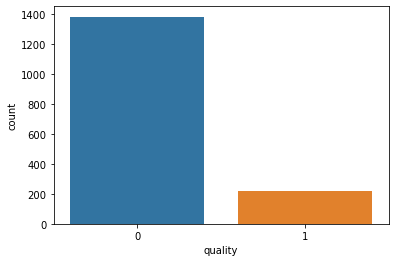

In [16]:
sns.countplot(df["quality"])

In [17]:
X = df.drop("quality", axis = 1)
y = df["quality"]

In [18]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state =42)

In [19]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [20]:
rfc  = RandomForestClassifier(n_estimators  = 200)
rfc.fit(X_train,y_train)
pred_rfc = rfc.predict(X_test)
print(classification_report(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       273
           1       0.69      0.38      0.49        47

    accuracy                           0.88       320
   macro avg       0.80      0.68      0.71       320
weighted avg       0.87      0.88      0.87       320



In [21]:
print(confusion_matrix(y_test,pred_rfc))

[[265   8]
 [ 29  18]]


In [22]:
sgd = SGDClassifier(penalty = None)
sgd.fit(X_train,y_train)
pred_sgd = sgd.predict(X_test)

In [23]:
print(classification_report(y_test,pred_sgd))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91       273
           1       0.46      0.49      0.47        47

    accuracy                           0.84       320
   macro avg       0.69      0.70      0.69       320
weighted avg       0.84      0.84      0.84       320



In [24]:
print(confusion_matrix(y_test,pred_sgd))

[[246  27]
 [ 24  23]]


In [25]:
svc = SVC()
svc.fit(X_train,y_train)
pred_svc = svc.predict(X_test)
print(classification_report(y_test,pred_svc))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



In [26]:
parameters = {"C": [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],'kernel' : ['linear','rbf'],'gamma':[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]}
grid_svc = GridSearchCV(svc,param_grid=parameters,scoring = 'accuracy',cv=10)

In [27]:
grid_svc.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [28]:
grid_svc.best_params_

{'C': 1.2, 'gamma': 0.9, 'kernel': 'rbf'}

In [29]:
svc2 = SVC(C = 1.2,gamma = 0.9,kernel = 'rbf')
svc2.fit(X_train,y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test,pred_svc2))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       273
           1       0.89      0.34      0.49        47

    accuracy                           0.90       320
   macro avg       0.89      0.67      0.72       320
weighted avg       0.90      0.90      0.88       320



In [30]:
rfc_eval = cross_val_score(estimator =rfc,X = X_train,y = y_train,cv =10)
rfc_eval.mean()

0.9116695374015749